In [1]:
# takes 15m for 3m records

# todo:

# next steps:
# more bidding experiments

# previous steps:
# acbl_hand_records_dd_nwse_experiments.ipynb creates acbl_hand_records_bidding_experiments.pkl

# Requirements
# If pickle errors: pip install --upgrade pandas

In [2]:
import pandas as pd
import pathlib
import mlBridgeLib
from collections import defaultdict
import matplotlib.pyplot as plt
from IPython.display import display # needed to define display() method in vscode

In [3]:
# override pandas display options
mlBridgeLib.pd_options_display()

In [4]:
rootPath = pathlib.Path('e:/bridge/data')
acblPath = rootPath.joinpath('acbl')

In [5]:
# takes 45s
acbl_hand_records_dd_nwse_augmented_df = acblPath.joinpath('acbl_hand_records_dd_nwse_augmented.pkl')
augmented_df = pd.read_pickle(acbl_hand_records_dd_nwse_augmented_df)
display(len(augmented_df),augmented_df)

3144755

,ref,hand_record_id,event_id,Board,EventBoard,Dealer,Vul,board_record_string,Hands,Par,Par_var,Par_nwse,DDmakes,DDmakes_nwse,DD_N_C,DD_N_D,DD_N_H,DD_N_S,DD_N_N,DD_E_C,DD_E_D,DD_E_H,DD_E_S,DD_E_N,DD_S_C,DD_S_D,DD_S_H,DD_S_S,DD_S_N,DD_W_C,DD_W_D,DD_W_H,DD_W_S,DD_W_N,Hands_Bin,HB_N,HB_E,HB_S,HB_W,HCP,HCP_N,HCP_N_S,HCP_N_H,HCP_N_D,HCP_N_C,HCP_E,HCP_E_S,HCP_E_H,HCP_E_D,HCP_E_C,HCP_S,HCP_S_S,HCP_S_H,HCP_S_D,HCP_S_C,HCP_W,HCP_W_S,HCP_W_H,HCP_W_D,HCP_W_C,...,SC9,SC8,SC7,SC6,SC5,SC4,SC3,SC2,WSA,WSK,WSQ,WSJ,WST,WS9,WS8,WS7,WS6,WS5,WS4,WS3,WS2,WHA,WHK,WHQ,WHJ,WHT,WH9,WH8,WH7,WH6,WH5,WH4,WH3,WH2,WDA,WDK,WDQ,WDJ,WDT,WD9,WD8,WD7,WD6,WD5,WD4,WD3,WD2,WCA,WCK,WCQ,WCJ,WCT,WC9,WC8,WC7,WC6,WC5,WC4,WC3,WC2
0,"(acbl, 2620401)",77908,100961,09,200217A_09,N,E_W,ST6HK32DJ2CAJ9874SQJ942H765DT874CQSA853HQDKQ963CK52SK7HAJT984DA5CT63,"((T6, K32, J2, AJ9874), (A853, Q, KQ963, K52), (K7, AJT984, A5, T63), (QJ942, 765, T874, Q))","(200, [(4, S, *, EW, -1)])",300,"(-100, [(5, C, *, S, -1)])","((10, 4, 10, 4, 8), (2, 9, 3, 9, 2), (10, 4, 10, 4, 8), (2, 9, 3, 9, 2))","((9, 3, 9, 3, 8), (2, 10, 3, 10, 2), (10, 3, 9, 3, 8), (2, 10, 3, 10, 2))",10,4,10,4,8,2,9,3,9,2,10,4,10,4,8,2,9,3,9,2,"((0b100010000010000000001100010000000011001011100100, (0b100010000, 0b100000000011, 0b1000000001...",0b100010000010000000001100010000000011001011100100,0b1000001001010001000000000001100100100100100000001001,0b100000100000100111100010010000000010000000100010010,0b11010000101000000011100000001011001000010000000000,"((9, (0, 3, 1, 5)), (14, (4, 2, 5, 3)), (12, (3, 5, 4, 0)), (5, (3, 0, 0, 2)))",9,0,3,1,5,14,4,2,5,3,12,3,5,4,0,5,3,0,0,2,...,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,"(acbl, 2620412)",77908,100961,20,200217A_20,W,Both,ST85HKJDJ43CKJ873SQ32HA643DK96CT94SAJ64HT98DT75CA52SK97HQ752DAQ82CQ6,"((T85, KJ, J43, KJ873), (AJ64, T98, T75, A52), (K97, Q752, AQ82, Q6), (Q32, A643, K96, T94))","(90, [(1, D, , NS, 1), (1, C, , NS, 1), (1, N, , NS, 0)])",0,"(90, [(1, N, , NS, 0), (1, D, , NS, 1), (1, C, , NS, 1)])","((8, 8, 7, 7, 7), (4, 5, 6, 6, 6), (8, 8, 7, 7, 7), (4, 5, 6, 6, 6))","((8, 8, 7, 7, 7), (4, 5, 6, 6, 5), (8, 8, 7, 7, 7), (4, 5, 6, 6, 5))",8,8,7,7,7,4,5,6,6,6,8,8,7,7,7,4,5,6,6,6,"((0b101001000010100000000000010000001100101001100010, (0b101001000, 0b101000000000, 0b1000000110...",0b101001000010100000000000010000001100101001100010,0b1001000010100000011100000000001001010001000000001001,0b100010100000001000010100110100010000010010000010000,0b10000000011100000001011001000100100000000110000100,"((9, (0, 4, 1, 4)), (9, (5, 0, 0, 4)), (13, (3, 2, 6, 2)), (9, (2, 4, 3, 0)))",9,0,4,1,4,9,5,0,0,4,13,3,2,6,2,9,2,4,3,0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0
2,"(acbl, 2620411)",77908,100961,19,200217A_19,S,E_W,STH764DAQ92CQJ653SQJ763HKJTD65CAKTSK984H5DT8743C987SA52HAQ9832DKJC42,"((T, 764, AQ92, QJ653), (K984, 5, T8743, 987), (A52, AQ9832, KJ, 42), (QJ763, KJT, 65, AKT))","(140, [(3, H, , NS, 0)])",-60,"(200, [(4, S, *, EW, -1)])","((9, 7, 9, 4, 6), (4, 6, 3, 8, 6), (9, 7, 9, 5, 6), (4, 6, 3, 8, 6))","((8, 6, 10, 4, 6), (5, 7, 2, 9, 4), (8, 6, 10, 4, 6), (5, 7, 2, 9, 4))",9,7,9,4,6,4,6,3,8,6,9,7,9,5,6,4,6,3,8,6,"((0b100000000000000011010010100100000010011000011010, (0b100000000, 0b110100, 0b1010010000001, 0...",0b100000000000000011010010100100000010011000011010,0b100011000100000000000100000001011001100000011100000,0b1000000001001101001100001101010000000000000000000101,0b11000110010010110000000000000000110001100100000000,"((9, (0, 0, 6, 3)), (3, (3, 0, 0, 0)), (14, (4, 6, 4, 0)), (14, (3, 4, 0, 7)))",9,0,0,6,3,3,3,0,0,0,14,4,6,4,0,14,3,4,0,7,...,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0
3,"(acbl, 2620420)",77908,100961,28,200217A_28,W,N_S,STHQJ9632DJ9CJ932SKQH8DQT86542CT76SJ76HATDAK3CAKQ84SA985432HK754D7C5,"((T, QJ9632, J9, J932), (J76, AT, AK3, AK

In [6]:
valid_start, valid_end = "210801","210815"
test_start, test_end = valid_end, "999999"
#valid_start, valid_end = "210601","210701"
#test_start, test_end = valid_end, "999999"

In [7]:
# takes 8s
augmented_df['Valid'] = augmented_df['EventBoard'].between(valid_start,valid_end,inclusive='left')
sum(augmented_df['Valid'])

84325

In [8]:
# takes 10s
# remove test dataset from df
augmented_df['Test'] = augmented_df['EventBoard'].between(test_start,test_end,inclusive='left')
test = augmented_df[augmented_df['Test']].copy()
augmented_df = augmented_df[~augmented_df['Test']].copy()
len(augmented_df),len(test),sum(test['Test'])

(3049864, 94891, 94891)

In [10]:
# takes 4m-14m
import fastai.tabular.all

# dependent variable column names
dep_vars = ['DD_N_C_avg', 'DD_N_D_avg', 'DD_N_H_avg', 'DD_N_S_avg', 'DD_N_N_avg']
dep_vars += ['HCP_E', 'HCP_S', 'HCP_W']
dep_vars += ['QT_S', 'QT_S_S', 'QT_S_H', 'QT_S_D', 'QT_S_C']
dep_vars += ['SL_S_S', 'SL_S_H', 'SL_S_D', 'SL_S_C']
display("dep_vars:",dep_vars)

# continuous valued column names
cont_names = ['Vul_NS', 'Vul_EW']
#cont_names += ['HCP_NS', 'HCP_EW']
cont_names += ['HCP_N'] #, 'HCP_S']
cont_names += ['HCP_N_S', 'HCP_N_H', 'HCP_N_D', 'HCP_N_C']
#cont_names += ['HCP_S_S', 'HCP_S_H', 'HCP_S_D', 'HCP_S_C']
#cont_names += ['HCP_E_S', 'HCP_E_H', 'HCP_E_D', 'HCP_E_C']
#cont_names += ['HCP_W_S', 'HCP_W_H', 'HCP_W_D', 'HCP_W_C']
cont_names += ['QT_N_S', 'QT_N_H', 'QT_N_D', 'QT_N_C']
cont_names += ['SL_N_S', 'SL_N_H', 'SL_N_D', 'SL_N_C']
cont_names += [direction+suit+card for direction in ['N'] for suit in mlBridgeLib.SHDC for card in mlBridgeLib.ranked_suit if direction+suit+card in augmented_df]
#cont_names += ohe_hands_df.columns.to_list()

# categorical valued column names. fastai wants ints.
# better?
#cat_names = list(df.select_dtypes(['category']).columns)
#df[cat_names] = df[cat_names].apply(lambda x: x.cat.codes)
cat_names = ['SL_Max_NS', 'SL_Max_EW']

#split = fastai.tabular.all.RandomSplitter(valid_pct=0.2)(fastai.tabular.all.range_of(df))
#test = pd.Series(augmented_df['EventBoard'].ge("210701"),name='Test',dtype='bool') # note: using augmented_df instead of df for split
#valid = pd.Series(augmented_df['EventBoard'].between("210601","210701"),name='Valid',dtype='bool') # note: using augmented_df instead of df for split
df = augmented_df[cont_names+cat_names+dep_vars].copy() # pd.concat([augmented_df[cont_names+cat_names],valid],axis='columns')
df.reset_index(drop=True,inplace=True)
display(len(df), df.head())

for n in cat_names:
    df[n] = df[n].cat.codes
cont_names += cat_names
cat_names = []
print(cont_names, cat_names)

# current fastai/pytorch has a bug where bool is treated as object and thus erroring out.
for n in cont_names:
    if pd.api.types.is_bool_dtype(df[n]):
        df[n] = df[n].astype('uint8')

# special case catagoricals: catagoricals which are to be made into continuous
#df = df.astype({'Par_Score':'int16'})

#assert len(set(cont_names+cat_names+dep_vars)) == len(cont_names+cat_names)
assert len(set(cont_names+cat_names+dep_vars)) == len(cont_names+cat_names+dep_vars)
for n in df:
    assert n in cont_names+cat_names+dep_vars, n
    assert not pd.api.types.is_bool_dtype(df[n]), n # TabularDataLoaders.from_df has bug which disallows bool
    assert not pd.api.types.is_object_dtype(df[n]), n
for n in cont_names+cat_names+dep_vars:
    assert n in df

# create fastai dataloader
procs = [fastai.tabular.all.Normalize] # fastai.tabular.all.Categorify, fastai.tabular.all.FillMissing, 
y_names = dep_vars
# valid_idx specifies a list of indexes to validation rows.
#assert pd.api.types.is_bool_dtype(df['Valid'])
valid_idx = df[augmented_df['Valid'].values].index # using augmented_df
assert max(valid_idx) < len(df)
bs = 1024 # fastai results weird out at > 1024 (on 1660ti).
device = 'cuda' # 'cuda' or 'cpu'
# interaction problem between specifying all cont_names, cat_names and valid_idx.

dls = fastai.tabular.all.TabularDataLoaders.from_df(df, proc=procs, cont_names=cont_names, cat_names=cat_names,
    y_names=y_names, valid_idx=valid_idx, bs=bs, device=device, verbose=True) # max is len(df)-len(valid_idx)

# create fastai tabular_learner from dataloader
layers = [8192, 8192, 4096, 4096, 2048, 2048, 1024, 1024, 512, 512, 256, 256, 128, 128, 64, 64, 32, 32, 16, 16]
metrics = fastai.tabular.all.accuracy_multi if len(y_names) else fastai.tabular.all.accuracy
learn = fastai.tabular.all.tabular_learner(dls, layers=layers, metrics=metrics)

# fit data
learn.fit(1)

'dep_vars:'

['DD_N_C_avg',
 'DD_N_D_avg',
 'DD_N_H_avg',
 'DD_N_S_avg',
 'DD_N_N_avg',
 'HCP_E',
 'HCP_S',
 'HCP_W',
 'QT_S',
 'QT_S_S',
 'QT_S_H',
 'QT_S_D',
 'QT_S_C',
 'SL_S_S',
 'SL_S_H',
 'SL_S_D',
 'SL_S_C']

3049864

,Vul_NS,Vul_EW,HCP_N,HCP_N_S,HCP_N_H,HCP_N_D,HCP_N_C,QT_N_S,QT_N_H,QT_N_D,QT_N_C,SL_N_S,SL_N_H,SL_N_D,SL_N_C,NSA,NSK,NSQ,NSJ,NST,NS9,NS8,NS7,NS6,NS5,NS4,NS3,NS2,NHA,NHK,NHQ,NHJ,NHT,NH9,NH8,NH7,NH6,NH5,NH4,NH3,NH2,NDA,NDK,NDQ,NDJ,NDT,ND9,ND8,ND7,ND6,ND5,ND4,ND3,ND2,NCA,NCK,NCQ,NCJ,NCT,NC9,NC8,NC7,NC6,NC5,NC4,NC3,NC2,SL_Max_NS,SL_Max_EW,DD_N_C_avg,DD_N_D_avg,DD_N_H_avg,DD_N_S_avg,DD_N_N_avg,HCP_E,HCP_S,HCP_W,QT_S,QT_S_S,QT_S_H,QT_S_D,QT_S_C,SL_S_S,SL_S_H,SL_S_D,SL_S_C
0,False,True,9,0,3,1,5,0.00,0.50,0.00,1.00,2,3,2,6,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,0,0,SL_NS_H,SL_EW_S,9.50,3.50,9.50,3.50,8.00,14,12,5,2.50,0.50,1.00,1.00,0.00,2,6,2,3
1,True,True,9,0,4,1,4,0.00,0.50,0.00,0.50,3,2,3,5,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,SL_NS_D,SL_EW_S,8.00,8.00,7.00,7.00,7.00,9,13,9,2.00,0.50,0.00,1.50,0.00,3,4,4,2
2,False,True,9,0,0,6,3,0.00,0.00,1.50,0.00,1,3,4,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,1,0,SL_NS_H,SL_EW_S,8.50,6.50,9.50,4.00,6.00,3,14,14,3.00,1.00,1.50,0.50,0.00,3,6,2,2
3,True,False,5,0,3,1,1,0.00,0.00,0.00,0.00,1,6,2,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,SL_NS_H,SL_EW_D,1.50,0.50,10.00,8.00,1.00,21,7,7,1.50,1.00,0.50,0.00,0.00,7,4,1,1
4,True,True,9,0,2,0,7,0.00,0.00,0.00,2.00,1,5,2,5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,0,0,0,1,SL_NS_H,SL_EW_S,6.50,2.50,6.00,1.50,3.50,11,4,16,0.00,0.00,0.00,0.00,0.00,3,3,4,3


['Vul_NS', 'Vul_EW', 'HCP_N', 'HCP_N_S', 'HCP_N_H', 'HCP_N_D', 'HCP_N_C', 'QT_N_S', 'QT_N_H', 'QT_N_D', 'QT_N_C', 'SL_N_S', 'SL_N_H', 'SL_N_D', 'SL_N_C', 'NSA', 'NSK', 'NSQ', 'NSJ', 'NST', 'NS9', 'NS8', 'NS7', 'NS6', 'NS5', 'NS4', 'NS3', 'NS2', 'NHA', 'NHK', 'NHQ', 'NHJ', 'NHT', 'NH9', 'NH8', 'NH7', 'NH6', 'NH5', 'NH4', 'NH3', 'NH2', 'NDA', 'NDK', 'NDQ', 'NDJ', 'NDT', 'ND9', 'ND8', 'ND7', 'ND6', 'ND5', 'ND4', 'ND3', 'ND2', 'NCA', 'NCK', 'NCQ', 'NCJ', 'NCT', 'NC9', 'NC8', 'NC7', 'NC6', 'NC5', 'NC4', 'NC3', 'NC2', 'SL_Max_NS', 'SL_Max_EW'] []
Setting up after_item: Pipeline: 
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: ReadTabBatch


epoch,train_loss,valid_loss,accuracy_multi,time
0,3.860454,4.468477,0.858860,07:06


In [11]:
assert all(df[augmented_df['Valid'].values].index == valid_idx)

In [12]:
def AppendPredictionsToDF(df, preds):
    valid_idx = df.index
    df_preds = pd.concat([df,pd.DataFrame(preds,index=valid_idx,columns=[n+'_pred' for n in y_names])],axis='columns')
    for n in y_names:
        df_preds.loc[valid_idx,n+'_var'] = df_preds[n]-df_preds[n+'_pred']
        # todo: use SL_Max_NS column as an index into 'DD_N_?', 'DD_N_?_pred', 'DD_N_?_var' to get max for each row
        #for sl in ['SL_Max_NS','SL_Max_EW']:
        #df_preds.loc[valid_idx,n+'_actual'] = df_preds.loc[valid_idx].apply(lambda r: r[[n+'_avg'][int(r[sl])]],axis='columns')
        #df_preds.loc[valid_idx,n+'_pred'] = df_preds.loc[valid_idx].apply(lambda r: r[[n+'_avg_pred'][int(r[sl])]],axis='columns')
        #df_preds.loc[valid_idx,n+'_avg_var'] = df_preds.loc[valid_idx,n+'_avg_actual']-df_preds.loc[valid_idx,n+'_avg_pred']
    return df_preds

In [13]:
# takes 2s
# get validation dataset predictions
preds, actuals = learn.get_preds() # defaults to learn.dls.valid
len(preds), len(actuals), preds, actuals

(84325,
 84325,
 tensor([[4.4833, 8.5841, 6.7216,  ..., 3.2557, 4.1741, 2.0130],
         [3.6113, 6.7036, 6.7944,  ..., 3.9616, 4.2090, 1.0988],
         [5.8255, 8.5827, 4.0284,  ..., 2.2763, 4.5091, 2.8286],
         ...,
         [4.5141, 3.4011, 7.4146,  ..., 4.0465, 1.9999, 3.6814],
         [4.7977, 3.7830, 5.9689,  ..., 3.2552, 1.9372, 3.8572],
         [5.6899, 3.1025, 7.5394,  ..., 4.5180, 2.5163, 2.9506]]),
 tensor([[4.5000, 6.0000, 3.0000,  ..., 4.0000, 3.0000, 1.0000],
         [7.0000, 7.5000, 7.5000,  ..., 5.0000, 5.0000, 0.0000],
         [5.0000, 7.0000, 3.5000,  ..., 2.0000, 6.0000, 1.0000],
         ...,
         [6.5000, 3.0000, 7.0000,  ..., 3.0000, 2.0000, 5.0000],
         [5.0000, 3.0000, 5.0000,  ..., 4.0000, 1.0000, 5.0000],
         [5.5000, 0.0000, 5.5000,  ..., 5.0000, 2.0000, 4.0000]]))

In [14]:
pd.concat([pd.DataFrame(actuals),pd.DataFrame(preds)],axis='columns')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,4.50,6.00,3.00,4.50,3.50,12.00,5.00,15.00,1.00,1.00,0.00,0.00,0.00,5.00,4.00,3.00,1.00,4.48,8.58,6.72,6.87,6.41,9.39,11.51,9.22,2.24,0.55,0.57,0.74,0.39,3.29,3.26,4.17,2.01
1,7.00,7.50,7.50,12.00,7.50,9.00,16.00,8.00,3.00,0.50,1.00,1.50,0.00,3.00,5.00,5.00,0.00,3.61,6.70,6.79,7.28,5.56,10.48,10.44,10.42,1.91,0.56,0.62,0.64,0.08,3.81,3.96,4.21,1.10
2,5.00,7.00,3.50,4.00,3.50,16.00,8.00,9.00,1.00,1.00,0.00,0.00,0.00,4.00,2.00,6.00,1.00,5.83,8.58,4.03,5.61,5.68,9.87,11.96,9.81,2.35,0.53,0.45,0.83,0.55,2.93,2.28,4.51,2.83
3,8.50,6.50,8.50,9.50,7.50,8.00,12.00,7.00,3.00,1.50,1.50,0.00,0.00,6.00,2.00,1.00,4.00,6.34,5.51,7.90,8.92,7.16,8.66,9.63,8.76,1.73,0.52,0.43,0.29,0.48,3.94,3.40,2.07,3.37
4,2.00,8.50,2.50,3.00,6.50,13.00,9.00,10.00,2.00,0.00,0.00,2.00,0.00,3.00,1.00,7.00,2.00,4.79,7.80,3.34,5.06,4.66,10.93,9.12,10.80,1.61,0.40,0.25,0.60,0.36,3.15,2.26,4.39,2.90
5,11.00,8.50,9.00,11.00,11.00,6.00,14.00,4.00,2.00,2.00,0.00,0.00,0.00,6.00,1.00,3.00,3.00,10.53,5.69,7.89,8.17,8.37,7.77,9.00,7.75,1.54,0.33,0.43,0.22,0.56,3.24,3.28,2.04,4.39
6,7.50,3.00,5.00,1.50,3.50,12.00,5.00,15.00,0.50,0.00,0.00,0.50,0.00,3.00,5.00,2.00,3.00,7.87,4.78,4.98,3.31,4.67,11.03,9.32,11.00,1.65,0.25,0.44,0.50,0.46,2.26,3.42,3.64,3.49
7,7.50,7.00,7.00,7.50,6.00,9.00,8.00,12.00,2.00,2.00,0.00,0.00,0.00,5.00,3.00,1.00,4.00,5.98,6.56,4.77,7.93,6.09,10.01,9.20,9.93,1.62,0.52,0.24,0.32,0.53,3.98,2.19,2.79,4.00
8,4.50,5.50,4.50,7.00,4.50,11.00,9.00,12.00,1.50,0.50,0.50,0.00,0.50,4.00,4.00,1.00,4.00,5.13,5.87,4.21,7.44,5.17,11.42,10.69,11.00,1.97,0.64,0.27,0.37,0.69,4.25,2.09,2.53,4.41
9,12.00,10.00,11.00,5.00,8.00,10.00,6.00,3.00,0.50,0.00,0.50,0.00,0.00,1.00,5.00,4.00,3.00,9.87,9.01,10.59,7.28,9.78,5.81,6.89,6.21,1.01,0.14,0.42,0.32,0.13,2.31,4.20,3.61,2.58


In [15]:
# create dataframe of predictions
df_preds = AppendPredictionsToDF(df[augmented_df['Valid'].values], preds)
df_preds.sort_index(axis='columns', inplace=True)
display(len(df_preds), df_preds)

84325

,DD_N_C_avg,DD_N_C_avg_pred,DD_N_C_avg_var,DD_N_D_avg,DD_N_D_avg_pred,DD_N_D_avg_var,DD_N_H_avg,DD_N_H_avg_pred,DD_N_H_avg_var,DD_N_N_avg,DD_N_N_avg_pred,DD_N_N_avg_var,DD_N_S_avg,DD_N_S_avg_pred,DD_N_S_avg_var,HCP_E,HCP_E_pred,HCP_E_var,HCP_N,HCP_N_C,HCP_N_D,HCP_N_H,HCP_N_S,HCP_S,HCP_S_pred,HCP_S_var,HCP_W,HCP_W_pred,HCP_W_var,NC2,NC3,NC4,NC5,NC6,NC7,NC8,NC9,NCA,NCJ,NCK,NCQ,NCT,ND2,ND3,ND4,ND5,ND6,ND7,ND8,ND9,NDA,NDJ,NDK,NDQ,NDT,NH2,NH3,NH4,NH5,NH6,NH7,NH8,NH9,NHA,NHJ,NHK,NHQ,NHT,NS2,NS3,NS4,NS5,NS6,NS7,NS8,NS9,NSA,NSJ,NSK,NSQ,NST,QT_N_C,QT_N_D,QT_N_H,QT_N_S,QT_S,QT_S_C,QT_S_C_pred,QT_S_C_var,QT_S_D,QT_S_D_pred,QT_S_D_var,QT_S_H,QT_S_H_pred,QT_S_H_var,QT_S_S,QT_S_S_pred,QT_S_S_var,QT_S_pred,QT_S_var,SL_Max_EW,SL_Max_NS,SL_N_C,SL_N_D,SL_N_H,SL_N_S,SL_S_C,SL_S_C_pred,SL_S_C_var,SL_S_D,SL_S_D_pred,SL_S_D_var,SL_S_H,SL_S_H_pred,SL_S_H_var,SL_S_S,SL_S_S_pred,SL_S_S_var,Vul_EW,Vul_NS
6363,4.50,4.48,0.02,6.00,8.58,-2.58,3.00,6.72,-3.72,3.50,6.41,-2.91,4.50,6.87,-2.37,12,9.39,2.61,8,8,0,0,0,5,11.51,-6.51,15,9.22,5.78,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,2.00,0.00,0.00,0.00,1.00,0.00,0.39,-0.39,0.00,0.74,-0.74,0.00,0.57,-0.57,1.00,0.55,0.45,2.24,-1.24,0,1,4,5,2,2,1,2.01,-1.01,3,4.17,-1.17,4,3.26,0.74,5,3.29,1.71,1,1
6364,7.00,3.61,3.39,7.50,6.70,0.80,7.50,6.79,0.71,7.50,5.56,1.94,12.00,7.28,4.72,9,10.48,-1.48,7,2,0,0,5,16,10.44,5.56,8,10.42,-2.42,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,0,1,0.00,0.00,0.00,1.00,3.00,0.00,0.08,-0.08,1.50,0.64,0.86,1.00,0.62,0.38,0.50,0.56,-0.06,1.91,1.09,0,3,5,1,1,6,0,1.10,-1.10,5,4.21,0.79,5,3.96,1.04,3,3.81,-0.81,1,1
6365,5.00,5.83,-0.83,7.00,8.58,-1.58,3.50,4.03,-0.53,3.50,5.68,-2.18,4.00,5.61,-1.61,16,9.87,6.13,7,4,0,3,0,8,11.96,-3.96,9,9.81,-0.81,0,1,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1.00,0.00,0.50,0.00,1.00,0.00,0.55,-0.55,0.00,0.83,-0.83,0.00,0.45,-0.45,1.00,0.53,0.47,2.35,-1.35,2,1,6,2,3,2,1,2.83,-1.83,6,4.51,1.49,2,2.28,-0.28,4,2.93,1.07,1,1
6366,8.50,6.34,2.16,6.50,5.51,0.99,8.50,7.90,0.60,7.50,7.16,0.34,9.50,8.92,0.58,8,8.66,-0.66,13,6,6,1,0,12,9.63,2.37,7,8.76,-1.76,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.00,1.50,0.00,0.00,3.00,0.00,0.48,-0.48,0.00,0.29,-0.29,1.50,0.43,1.07,1.50,0.52,0.98,1.73,1.27,1,3,3,4,5,1,4,3.37,0.63,1,2.07,-1.07,2,3.40,-1.40,6,3.94,2.06,1,1
6367,2.00,4.79,-2.79,8.50,7.80,0.70,2.50,3.34,-0.84,6.50,4.66,1.84,3.00,5.06,-2.06,13,10.93,2.07,8,1,0,4,3,9,9.12,-0.12,10,10.80,-0.80,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0.00,0.00,1.00,0.50,2.00,0.00,0.36,-0.36,2.00,0.60,1.40,0.00,0.25,-0.25,0.00,0.40,-0.40,1.61,0.39,2,1,3,3,4,3,2,2.90,-0.90,7,4.39,2.61,1,2.26,-1.26,3,3.15,-0.15,1,1
6368,11.00,10.53,0.47,8.50,5.69,2.81,9.00,7.89,1.11,11.00,8.37,2.63,11.00,8.17,2.83,6,7.77,-1.77,16,5,7,4,0,14,9.00,5.00,4,7.75,-3.75,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.00,2.00,0.50,0.00,2.00,0.00,0.56,-0.56,0.00,0.22,-0.22,0.00,0.43,-0.43,2.00,0.33,1.67,1.54,0.46,1,0,5,2,5,1,3,4.39,-1.39,3,2.04,0.96,1,3.28,-2.28,6,3.24,2.76,1,1
6369,7.50,7.87,-0.37,3.00,4.78,-1.78,5.00,4.98,0.02,3.50,4.67,-1.17,1.50,3.31,-1.81,12,11.03,0.97,8,8,0,0,0,5,9.32,-4.32,15,11.00,4.00,1,0,0,1,1,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,2.00,0.00,0.00,0.00,0.50,0.00,0.46,-0.46,0.50,0.50,0.00,0.00,0.44,-0.44,0.00,0.25,-0.25,1.65,-1.15,3,0,6,4,2,1,3,3.49,-0.49,2,3.64,-1.64,5,3.42,1.58,3,2.26,0.74,1,1
6370,7.50,5.98,1.52,7.00,6.56,0.44,7.00,4.77,2.23,6.00,6.09,-0.09,7.50,7.93,-0.43,9,10.01,-1.01,11,0,7,3,1,8,9.20,-1.20,12,9.93,2.07,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0.00,2.00,0.50,0.00,2.00,0.00,0.53,-0.53,0.00,0.32,-0.32,

In [16]:
hcp_cols = ['HCP_N' if s == 'N' else 'HCP_'+s+'_pred' for s in mlBridgeLib.NESW]
df_preds['HCP_sum'] = df_preds[hcp_cols].sum(axis='columns')
df_preds['HCP_sum_var'] = 40-df_preds['HCP_sum']
df_preds[hcp_cols+['HCP_sum','HCP_sum_var']]

,HCP_N,HCP_E_pred,HCP_S_pred,HCP_W_pred,HCP_sum,HCP_sum_var
6363,8,9.39,11.51,9.22,38.13,1.87
6364,7,10.48,10.44,10.42,38.34,1.66
6365,7,9.87,11.96,9.81,38.64,1.36
6366,13,8.66,9.63,8.76,40.06,-0.06
6367,8,10.93,9.12,10.80,38.85,1.15
6368,16,7.77,9.00,7.75,40.52,-0.52
6369,8,11.03,9.32,11.00,39.35,0.65
6370,11,10.01,9.20,9.93,40.13,-0.13
6371,8,11.42,10.69,11.00,41.11,-1.11
6372,21,5.81,6.89,6.21,39.91,0.09


<AxesSubplot:>

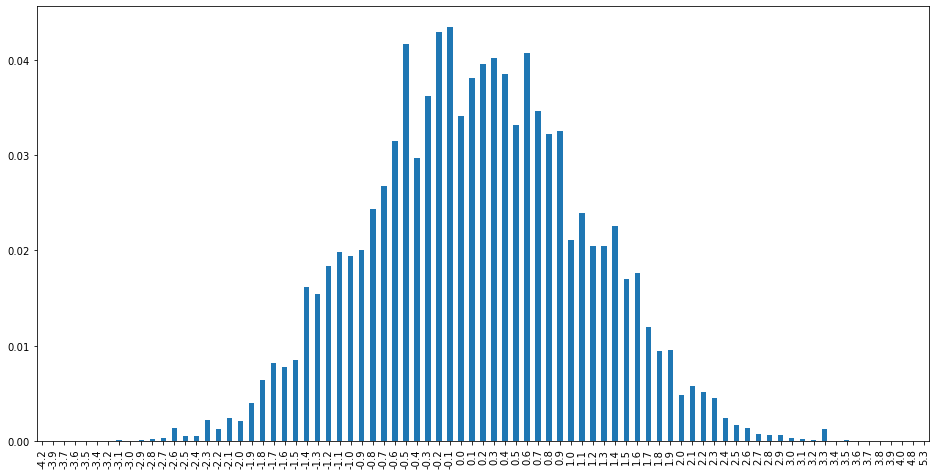

In [17]:
# predicted variance of HCP from 40
df_preds['HCP_sum_var'].astype('float').round(1).value_counts(normalize=True).sort_index().plot(kind='bar',figsize=(16,8))

<AxesSubplot:>

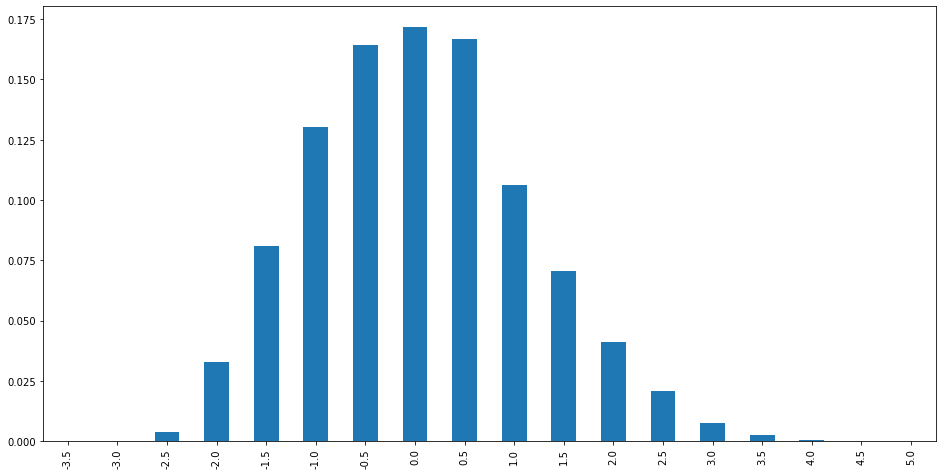

In [18]:
# predicted QT variance
df_preds['QT_S_var'].astype('float').div(5).round(1).mul(5).value_counts(normalize=True).sort_index().plot(kind='bar',figsize=(16,8))

<AxesSubplot:title={'center':'Validation Dataset'}, xlabel='Variance by Trick', ylabel='Freqency Percentage'>

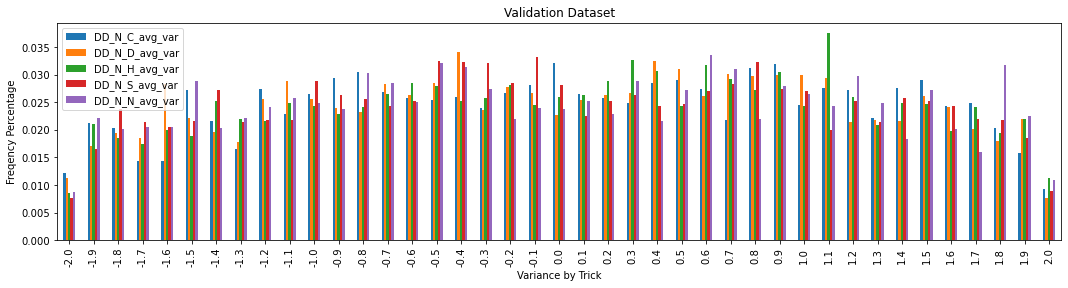

In [19]:
# plot variance .1 trick precision
plotd = {}
for n in [n for n in y_names if n.startswith('DD')]:
    plotd[n+'_var'] = df_preds[n+'_var'][df_preds[n+'_var'].between(-2,2)].astype('float').round(1).value_counts(normalize=True).sort_index()
pd.DataFrame(plotd).plot(kind='bar',figsize=(18,4), xlabel='Variance by Trick', ylabel='Freqency Percentage', title='Validation Dataset')

<AxesSubplot:title={'center':'Validation Dataset'}, xlabel='Variance by Trick', ylabel='Freqency Percentage'>

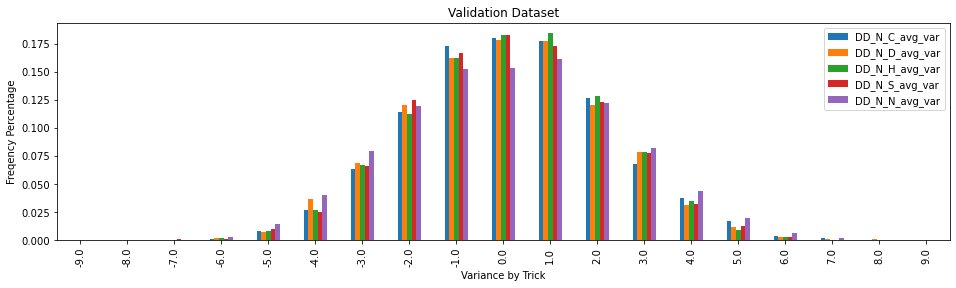

In [20]:
# plot variance 1 trick precision
plotd = {}
for n in [n for n in y_names if n.startswith('DD')]:
    plotd[n+'_var'] = df_preds[n+'_var'].astype('float').round(0).value_counts(normalize=True).sort_index()
pd.DataFrame(plotd).plot(kind='bar',figsize=(16,4), xlabel='Variance by Trick', ylabel='Freqency Percentage', title='Validation Dataset')

<AxesSubplot:title={'center':'Validation Dataset'}, xlabel='Variance by HCP', ylabel='Frequency Percentage'>

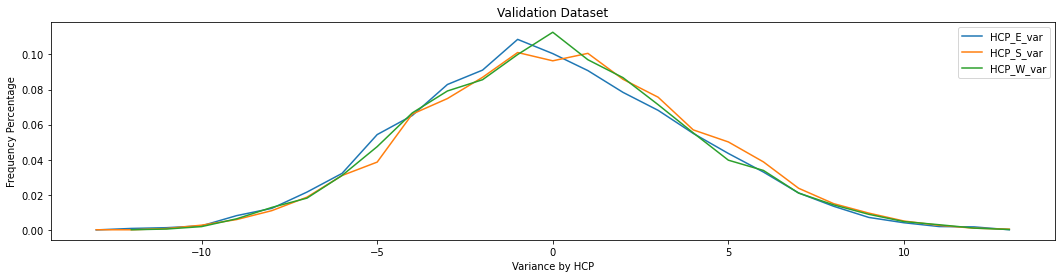

In [21]:
# plot variance .1 trick precision
plotd = {}
for n in [n for n in y_names if n.startswith('HCP')]:
    plotd[n+'_var'] = df_preds[n+'_var'][df_preds[n+'_var'].between(-13,13)].astype('float').round(0).value_counts(normalize=True).sort_index()
pd.DataFrame(plotd).plot(figsize=(18,4), xlabel='Variance by HCP', ylabel='Frequency Percentage', title='Validation Dataset')

In [22]:
testdf = test[cont_names+cat_names+dep_vars].copy()
# need to transform columns for inference too
for n in testdf:
    if pd.api.types.is_categorical_dtype(testdf[n]):
        testdf[n] = testdf[n].cat.codes

# current fastai/pytorch has a bug where bool is treated as object and thus erroring out.
for n in testdf:
    if pd.api.types.is_bool_dtype(testdf[n]):
        testdf[n] = testdf[n].astype('uint8')

In [23]:
testdf.dtypes

Vul_NS          uint8
Vul_EW          uint8
HCP_N            int8
HCP_N_S          int8
HCP_N_H          int8
HCP_N_D          int8
HCP_N_C          int8
QT_N_S        float32
QT_N_H        float32
QT_N_D        float32
QT_N_C        float32
SL_N_S           int8
SL_N_H           int8
SL_N_D           int8
SL_N_C           int8
NSA              int8
NSK              int8
NSQ              int8
NSJ              int8
NST              int8
NS9              int8
NS8              int8
NS7              int8
NS6              int8
NS5              int8
               ...   
NC7              int8
NC6              int8
NC5              int8
NC4              int8
NC3              int8
NC2              int8
SL_Max_NS        int8
SL_Max_EW        int8
DD_N_C_avg    float64
DD_N_D_avg    float64
DD_N_H_avg    float64
DD_N_S_avg    float64
DD_N_N_avg    float64
HCP_E            int8
HCP_S            int8
HCP_W            int8
QT_S          float32
QT_S_S        float32
QT_S_H        float32
QT_S_D    

In [24]:
# takes 10s
# get predictions for test (as opposed to validation) dataset
dl_test = learn.dls.test_dl(testdf, with_labels=True)
preds, actuals = learn.get_preds(dl=dl_test)
len(preds), len(actuals), preds, actuals

(94891,
 94891,
 tensor([[3.3999, 5.7345, 7.7158,  ..., 4.3241, 3.5347, 2.1637],
         [3.7220, 6.3907, 6.6729,  ..., 3.7921, 3.8721, 1.3118],
         [6.8139, 4.9376, 7.4335,  ..., 3.5077, 2.3970, 2.7535],
         ...,
         [8.1346, 9.3814, 9.9472,  ..., 4.0645, 3.5917, 3.1751],
         [6.9721, 3.9629, 2.8122,  ..., 2.4652, 3.0526, 4.5470],
         [9.6107, 7.7539, 7.2496,  ..., 3.0468, 3.0695, 4.4376]]),
 tensor([[ 3.0000,  3.5000,  9.5000,  ...,  6.0000,  2.0000,  3.0000],
         [ 2.5000,  3.0000,  3.5000,  ...,  2.0000,  5.0000,  1.0000],
         [ 5.5000,  2.5000,  6.5000,  ...,  4.0000,  2.0000,  4.0000],
         ...,
         [ 9.0000, 11.5000, 11.0000,  ...,  4.0000,  3.0000,  4.0000],
         [ 7.0000,  5.0000,  0.0000,  ...,  3.0000,  2.0000,  6.0000],
         [ 8.5000,  8.0000,  7.5000,  ...,  4.0000,  3.0000,  4.0000]]))

In [25]:
pd.concat([testdf[dep_vars],pd.DataFrame(preds,index=testdf.index)],axis='columns')

,DD_N_C_avg,DD_N_D_avg,DD_N_H_avg,DD_N_S_avg,DD_N_N_avg,HCP_E,HCP_S,HCP_W,QT_S,QT_S_S,QT_S_H,QT_S_D,QT_S_C,SL_S_S,SL_S_H,SL_S_D,SL_S_C,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
221,3.00,3.50,9.50,4.50,4.00,10,10,13,2.00,1.00,1.00,0.00,0.00,2,6,2,3,3.40,5.73,7.72,5.37,4.86,11.16,10.93,11.28,2.03,0.49,0.70,0.54,0.30,3.19,4.32,3.53,2.16
222,2.50,3.00,3.50,5.00,2.50,11,1,18,0.00,0.00,0.00,0.00,0.00,5,2,5,1,3.72,6.39,6.67,7.72,5.65,10.31,10.07,10.19,1.83,0.58,0.57,0.56,0.10,3.98,3.79,3.87,1.31
223,5.50,2.50,6.50,7.50,5.50,11,5,9,0.00,0.00,0.00,0.00,0.00,3,4,2,4,6.81,4.94,7.43,9.09,7.00,8.54,7.88,8.81,1.27,0.41,0.36,0.25,0.25,4.03,3.51,2.40,2.75
224,5.00,2.00,5.00,3.00,3.00,9,4,17,1.00,0.00,1.00,0.00,0.00,3,4,2,4,8.33,3.89,5.91,6.16,5.77,10.10,10.44,9.90,1.93,0.50,0.43,0.34,0.66,3.27,3.05,2.16,4.25
225,7.50,3.00,5.00,6.00,4.00,11,8,12,2.00,1.00,1.00,0.00,0.00,4,3,4,2,9.32,4.18,6.03,6.83,6.38,9.18,10.86,9.25,2.05,0.52,0.54,0.53,0.45,3.22,3.47,3.01,2.90
226,5.00,7.00,7.00,10.00,8.00,12,11,4,2.50,1.50,1.00,0.00,0.00,4,4,3,2,4.92,7.65,6.96,9.11,7.15,8.86,7.34,8.60,1.15,0.35,0.30,0.32,0.18,3.97,3.23,3.59,2.14
227,9.50,7.00,9.00,11.00,9.00,13,12,4,2.00,0.00,1.00,1.00,0.00,4,4,4,1,8.03,4.76,6.39,8.93,6.81,9.05,9.55,9.35,1.65,0.54,0.44,0.49,0.17,4.15,3.53,3.19,2.08
228,4.50,9.00,6.00,6.00,6.50,9,7,8,1.00,0.00,1.00,0.00,0.00,3,4,5,1,5.01,9.98,8.43,8.35,8.32,7.85,9.22,7.87,1.59,0.43,0.39,0.51,0.26,3.27,3.37,4.25,2.03
229,10.00,4.00,8.00,4.00,8.00,5,14,12,3.50,0.00,0.50,2.00,1.00,2,4,3,4,8.63,3.08,5.37,6.07,5.26,10.59,11.08,10.62,2.08,0.53,0.58,0.53,0.44,3.29,3.69,3.08,2.87
230,6.00,4.00,6.00,6.50,5.00,12,12,10,1.50,0.00,1.00,0.50,0.00,3,3,2,5,4.54,3.57,5.62,7.11,4.61,11.68,11.08,11.44,2.05,0.70,0.50,0.27,0.56,4.16,3.22,2.00,3.78


In [26]:
# takes 13s
# create dataframe with test predictions
df_preds = AppendPredictionsToDF(testdf, preds)
df_preds.sort_index(axis='columns', inplace=True)
display(len(df_preds), df_preds)

94891

,DD_N_C_avg,DD_N_C_avg_pred,DD_N_C_avg_var,DD_N_D_avg,DD_N_D_avg_pred,DD_N_D_avg_var,DD_N_H_avg,DD_N_H_avg_pred,DD_N_H_avg_var,DD_N_N_avg,DD_N_N_avg_pred,DD_N_N_avg_var,DD_N_S_avg,DD_N_S_avg_pred,DD_N_S_avg_var,HCP_E,HCP_E_pred,HCP_E_var,HCP_N,HCP_N_C,HCP_N_D,HCP_N_H,HCP_N_S,HCP_S,HCP_S_pred,HCP_S_var,HCP_W,HCP_W_pred,HCP_W_var,NC2,NC3,NC4,NC5,NC6,NC7,NC8,NC9,NCA,NCJ,NCK,NCQ,NCT,ND2,ND3,ND4,ND5,ND6,ND7,ND8,ND9,NDA,NDJ,NDK,NDQ,NDT,NH2,NH3,NH4,NH5,NH6,NH7,NH8,NH9,NHA,NHJ,NHK,NHQ,NHT,NS2,NS3,NS4,NS5,NS6,NS7,NS8,NS9,NSA,NSJ,NSK,NSQ,NST,QT_N_C,QT_N_D,QT_N_H,QT_N_S,QT_S,QT_S_C,QT_S_C_pred,QT_S_C_var,QT_S_D,QT_S_D_pred,QT_S_D_var,QT_S_H,QT_S_H_pred,QT_S_H_var,QT_S_S,QT_S_S_pred,QT_S_S_var,QT_S_pred,QT_S_var,SL_Max_EW,SL_Max_NS,SL_N_C,SL_N_D,SL_N_H,SL_N_S,SL_S_C,SL_S_C_pred,SL_S_C_var,SL_S_D,SL_S_D_pred,SL_S_D_var,SL_S_H,SL_S_H_pred,SL_S_H_var,SL_S_S,SL_S_S_pred,SL_S_S_var,Vul_EW,Vul_NS
221,3.00,3.40,-0.40,3.50,5.73,-2.23,9.50,7.72,1.78,4.00,4.86,-0.86,4.50,5.37,-0.87,10,11.16,-1.16,7,0,0,4,3,10,10.93,-0.93,13,11.28,1.72,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0.00,0.00,1.00,0.00,2.00,0.00,0.30,-0.30,0.00,0.54,-0.54,1.00,0.70,0.30,1.00,0.49,0.51,2.03,-0.03,0,2,1,4,4,4,3,2.16,0.84,2,3.53,-1.53,6,4.32,1.68,2,3.19,-1.19,1,1
222,2.50,3.72,-1.22,3.00,6.39,-3.39,3.50,6.67,-3.17,2.50,5.65,-3.15,5.00,7.72,-2.72,11,10.31,0.69,10,2,0,4,4,1,10.07,-9.07,18,10.19,7.81,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0.00,0.00,1.00,1.00,0.00,0.00,0.10,-0.10,0.00,0.56,-0.56,0.00,0.57,-0.57,0.00,0.58,-0.58,1.83,-1.83,0,3,4,1,5,3,1,1.31,-0.31,5,3.87,1.13,2,3.79,-1.79,5,3.98,1.02,1,1
223,5.50,6.81,-1.31,2.50,4.94,-2.44,6.50,7.43,-0.93,5.50,7.00,-1.50,7.50,9.09,-1.59,11,8.54,2.46,15,2,2,7,4,5,7.88,-2.88,9,8.81,0.19,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,1,0,0,0,1,1,0,0,0,0,0.00,0.00,2.00,1.00,0.00,0.00,0.25,-0.25,0.00,0.25,-0.25,0.00,0.36,-0.36,0.00,0.41,-0.41,1.27,-1.27,1,3,3,2,3,5,4,2.75,1.25,2,2.40,-0.40,4,3.51,0.49,3,4.03,-1.03,1,1
224,5.00,8.33,-3.33,2.00,3.89,-1.89,5.00,5.91,-0.91,3.00,5.77,-2.77,3.00,6.16,-3.16,9,10.10,-1.10,10,3,0,6,1,4,10.44,-6.44,17,9.90,7.10,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0.00,0.00,1.00,0.00,1.00,0.00,0.66,-0.66,0.00,0.34,-0.34,1.00,0.43,0.57,0.00,0.50,-0.50,1.93,-0.93,1,0,4,2,3,4,4,4.25,-0.25,2,2.16,-0.16,4,3.05,0.95,3,3.27,-0.27,1,1
225,7.50,9.32,-1.82,3.00,4.18,-1.18,5.00,6.03,-1.03,4.00,6.38,-2.38,6.00,6.83,-0.83,11,9.18,1.82,9,3,4,0,2,8,10.86,-2.86,12,9.25,2.75,0,0,0,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0.00,1.00,0.00,0.00,2.00,0.00,0.45,-0.45,0.00,0.53,-0.53,1.00,0.54,0.46,1.00,0.52,0.48,2.05,-0.05,1,0,6,1,3,3,2,2.90,-0.90,4,3.01,0.99,3,3.47,-0.47,4,3.22,0.78,1,1
226,5.00,4.92,0.08,7.00,7.65,-0.65,7.00,6.96,0.04,8.00,7.15,0.85,10.00,9.11,0.89,12,8.86,3.14,13,3,7,0,3,11,7.34,3.66,4,8.60,-4.60,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0.50,2.00,0.00,0.50,2.50,0.00,0.18,-0.18,0.00,0.32,-0.32,1.00,0.30,0.70,1.50,0.35,1.15,1.15,1.35,0,3,3,3,2,5,2,2.14,-0.14,3,3.59,-0.59,4,3.23,0.77,4,3.97,0.03,1,1
227,9.50,8.03,1.47,7.00,4.76,2.24,9.00,6.39,2.61,9.00,6.81,2.19,11.00,8.93,2.07,13,9.05,3.95,11,7,0,0,4,12,9.55,2.45,4,9.35,-5.35,1,1,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,1.50,0.00,0.00,1.00,2.00,0.00,0.17,-0.17,1.00,0.49,0.51,1.00,0.44,0.56,0.00,0.54,-0.54,1.65,0.35,1,3,6,0,2,5,1,2.08,-1.08,4,3.19,0.81,4,3.53,0.47,4,4.15,-0.15,1,1
228,4.50,5.01,-0.51,9.00,9.98,-0.98,6.00,8.43,-2.43,6.50,8.32,-1.82,6.00,8.35,-2.35,9,7.85,1.15,16,5,4,4,3,7,9.22,-2.22,8,7.87,0.13,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1.00,0.50,1.00,0.00,1.00,0.00,0.26,-0.26,0.00,0.51,-0.

<AxesSubplot:title={'center':'Test Dataset'}, xlabel='Variance by Trick', ylabel='Freqency Percentage'>

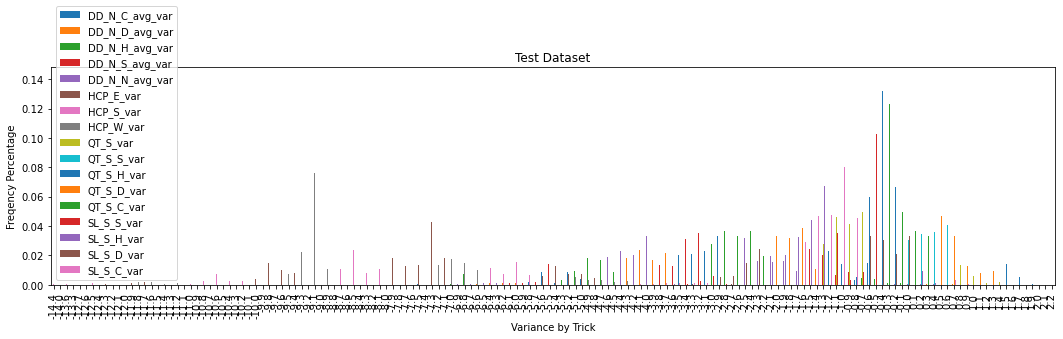

In [27]:
# plot with .1 trick precision
plotd = {}
for n in y_names:
    plotd[n+'_var'] = df_preds[n+'_var'][df_preds[n].between(-2,2)].astype('float').round(1).value_counts(normalize=True).sort_index()
pd.DataFrame(plotd).plot(kind='bar',figsize=(18,4), xlabel='Variance by Trick', ylabel='Freqency Percentage', title='Test Dataset')

<AxesSubplot:title={'center':'Test Dataset'}, xlabel='Variance by Trick', ylabel='Freqency Percentage'>

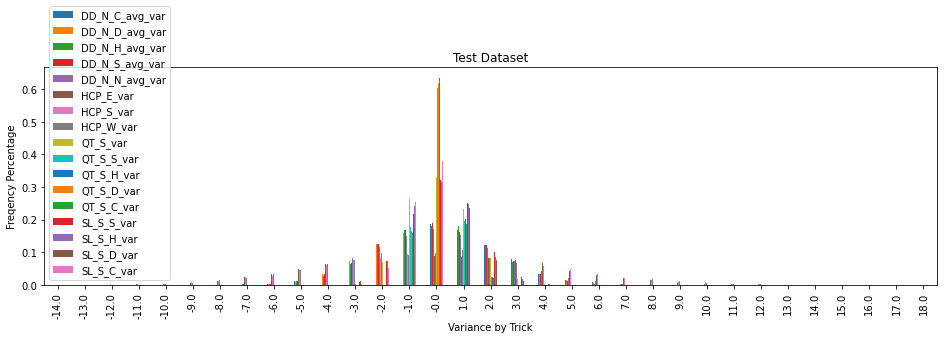

In [28]:
# plot with 1 trick precision
plotd = {}
for n in y_names:
    plotd[n+'_var'] = df_preds[n+'_var'].astype('float').round(0).value_counts(normalize=True).sort_index()
pd.DataFrame(plotd).plot(kind='bar',figsize=(16,4), xlabel='Variance by Trick', ylabel='Freqency Percentage', title='Test Dataset')

In [29]:
# takes 2s
# get validation dataset predictions. Pass passing learn.dls.valid) instead of default ().
preds, actuals = learn.get_preds(dl=learn.dls.valid)
len(preds), len(actuals), preds, actuals

(84325,
 84325,
 tensor([[4.4833, 8.5841, 6.7216,  ..., 3.2557, 4.1741, 2.0130],
         [3.6113, 6.7036, 6.7944,  ..., 3.9616, 4.2090, 1.0988],
         [5.8255, 8.5827, 4.0284,  ..., 2.2763, 4.5091, 2.8286],
         ...,
         [4.5141, 3.4011, 7.4146,  ..., 4.0465, 1.9999, 3.6814],
         [4.7977, 3.7830, 5.9689,  ..., 3.2552, 1.9372, 3.8572],
         [5.6899, 3.1025, 7.5394,  ..., 4.5180, 2.5163, 2.9506]]),
 tensor([[4.5000, 6.0000, 3.0000,  ..., 4.0000, 3.0000, 1.0000],
         [7.0000, 7.5000, 7.5000,  ..., 5.0000, 5.0000, 0.0000],
         [5.0000, 7.0000, 3.5000,  ..., 2.0000, 6.0000, 1.0000],
         ...,
         [6.5000, 3.0000, 7.0000,  ..., 3.0000, 2.0000, 5.0000],
         [5.0000, 3.0000, 5.0000,  ..., 4.0000, 1.0000, 5.0000],
         [5.5000, 0.0000, 5.5000,  ..., 5.0000, 2.0000, 4.0000]]))

In [30]:
# takes 3s
# create dataframe from validation dataset
df_preds = AppendPredictionsToDF(df[augmented_df['Valid'].values], preds)
df_preds.sort_index(axis='columns', inplace=True)
display(len(df_preds), df_preds)

84325

,DD_N_C_avg,DD_N_C_avg_pred,DD_N_C_avg_var,DD_N_D_avg,DD_N_D_avg_pred,DD_N_D_avg_var,DD_N_H_avg,DD_N_H_avg_pred,DD_N_H_avg_var,DD_N_N_avg,DD_N_N_avg_pred,DD_N_N_avg_var,DD_N_S_avg,DD_N_S_avg_pred,DD_N_S_avg_var,HCP_E,HCP_E_pred,HCP_E_var,HCP_N,HCP_N_C,HCP_N_D,HCP_N_H,HCP_N_S,HCP_S,HCP_S_pred,HCP_S_var,HCP_W,HCP_W_pred,HCP_W_var,NC2,NC3,NC4,NC5,NC6,NC7,NC8,NC9,NCA,NCJ,NCK,NCQ,NCT,ND2,ND3,ND4,ND5,ND6,ND7,ND8,ND9,NDA,NDJ,NDK,NDQ,NDT,NH2,NH3,NH4,NH5,NH6,NH7,NH8,NH9,NHA,NHJ,NHK,NHQ,NHT,NS2,NS3,NS4,NS5,NS6,NS7,NS8,NS9,NSA,NSJ,NSK,NSQ,NST,QT_N_C,QT_N_D,QT_N_H,QT_N_S,QT_S,QT_S_C,QT_S_C_pred,QT_S_C_var,QT_S_D,QT_S_D_pred,QT_S_D_var,QT_S_H,QT_S_H_pred,QT_S_H_var,QT_S_S,QT_S_S_pred,QT_S_S_var,QT_S_pred,QT_S_var,SL_Max_EW,SL_Max_NS,SL_N_C,SL_N_D,SL_N_H,SL_N_S,SL_S_C,SL_S_C_pred,SL_S_C_var,SL_S_D,SL_S_D_pred,SL_S_D_var,SL_S_H,SL_S_H_pred,SL_S_H_var,SL_S_S,SL_S_S_pred,SL_S_S_var,Vul_EW,Vul_NS
6363,4.50,4.48,0.02,6.00,8.58,-2.58,3.00,6.72,-3.72,3.50,6.41,-2.91,4.50,6.87,-2.37,12,9.39,2.61,8,8,0,0,0,5,11.51,-6.51,15,9.22,5.78,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,2.00,0.00,0.00,0.00,1.00,0.00,0.39,-0.39,0.00,0.74,-0.74,0.00,0.57,-0.57,1.00,0.55,0.45,2.24,-1.24,0,1,4,5,2,2,1,2.01,-1.01,3,4.17,-1.17,4,3.26,0.74,5,3.29,1.71,1,1
6364,7.00,3.61,3.39,7.50,6.70,0.80,7.50,6.79,0.71,7.50,5.56,1.94,12.00,7.28,4.72,9,10.48,-1.48,7,2,0,0,5,16,10.44,5.56,8,10.42,-2.42,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,0,1,0.00,0.00,0.00,1.00,3.00,0.00,0.08,-0.08,1.50,0.64,0.86,1.00,0.62,0.38,0.50,0.56,-0.06,1.91,1.09,0,3,5,1,1,6,0,1.10,-1.10,5,4.21,0.79,5,3.96,1.04,3,3.81,-0.81,1,1
6365,5.00,5.83,-0.83,7.00,8.58,-1.58,3.50,4.03,-0.53,3.50,5.68,-2.18,4.00,5.61,-1.61,16,9.87,6.13,7,4,0,3,0,8,11.96,-3.96,9,9.81,-0.81,0,1,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1.00,0.00,0.50,0.00,1.00,0.00,0.55,-0.55,0.00,0.83,-0.83,0.00,0.45,-0.45,1.00,0.53,0.47,2.35,-1.35,2,1,6,2,3,2,1,2.83,-1.83,6,4.51,1.49,2,2.28,-0.28,4,2.93,1.07,1,1
6366,8.50,6.34,2.16,6.50,5.51,0.99,8.50,7.90,0.60,7.50,7.16,0.34,9.50,8.92,0.58,8,8.66,-0.66,13,6,6,1,0,12,9.63,2.37,7,8.76,-1.76,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.00,1.50,0.00,0.00,3.00,0.00,0.48,-0.48,0.00,0.29,-0.29,1.50,0.43,1.07,1.50,0.52,0.98,1.73,1.27,1,3,3,4,5,1,4,3.37,0.63,1,2.07,-1.07,2,3.40,-1.40,6,3.94,2.06,1,1
6367,2.00,4.79,-2.79,8.50,7.80,0.70,2.50,3.34,-0.84,6.50,4.66,1.84,3.00,5.06,-2.06,13,10.93,2.07,8,1,0,4,3,9,9.12,-0.12,10,10.80,-0.80,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0.00,0.00,1.00,0.50,2.00,0.00,0.36,-0.36,2.00,0.60,1.40,0.00,0.25,-0.25,0.00,0.40,-0.40,1.61,0.39,2,1,3,3,4,3,2,2.90,-0.90,7,4.39,2.61,1,2.26,-1.26,3,3.15,-0.15,1,1
6368,11.00,10.53,0.47,8.50,5.69,2.81,9.00,7.89,1.11,11.00,8.37,2.63,11.00,8.17,2.83,6,7.77,-1.77,16,5,7,4,0,14,9.00,5.00,4,7.75,-3.75,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.00,2.00,0.50,0.00,2.00,0.00,0.56,-0.56,0.00,0.22,-0.22,0.00,0.43,-0.43,2.00,0.33,1.67,1.54,0.46,1,0,5,2,5,1,3,4.39,-1.39,3,2.04,0.96,1,3.28,-2.28,6,3.24,2.76,1,1
6369,7.50,7.87,-0.37,3.00,4.78,-1.78,5.00,4.98,0.02,3.50,4.67,-1.17,1.50,3.31,-1.81,12,11.03,0.97,8,8,0,0,0,5,9.32,-4.32,15,11.00,4.00,1,0,0,1,1,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,2.00,0.00,0.00,0.00,0.50,0.00,0.46,-0.46,0.50,0.50,0.00,0.00,0.44,-0.44,0.00,0.25,-0.25,1.65,-1.15,3,0,6,4,2,1,3,3.49,-0.49,2,3.64,-1.64,5,3.42,1.58,3,2.26,0.74,1,1
6370,7.50,5.98,1.52,7.00,6.56,0.44,7.00,4.77,2.23,6.00,6.09,-0.09,7.50,7.93,-0.43,9,10.01,-1.01,11,0,7,3,1,8,9.20,-1.20,12,9.93,2.07,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0.00,2.00,0.50,0.00,2.00,0.00,0.53,-0.53,0.00,0.32,-0.32,

<AxesSubplot:title={'center':'Validation Dataset'}, xlabel='Variance by Trick', ylabel='Freqency Percentage'>

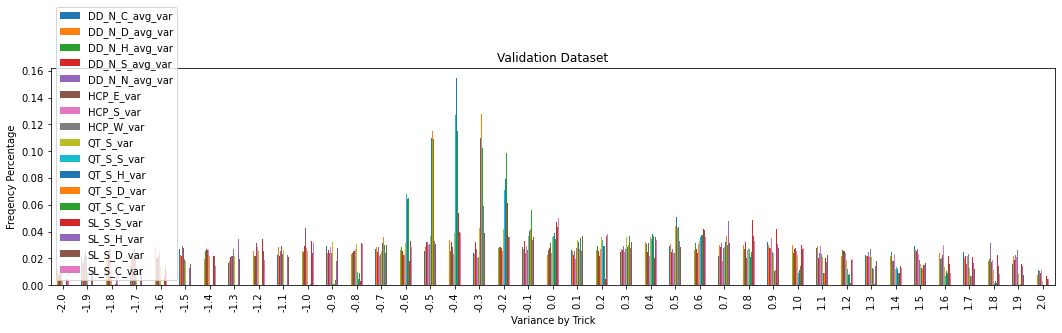

In [31]:
# plot dd variance using .1 trick precision
plotd = {}
for n in y_names:
    plotd[n+'_var'] = df_preds[n+'_var'][df_preds[n+'_var'].between(-2,2)].astype('float').round(1).value_counts(normalize=True).sort_index()
pd.DataFrame(plotd).plot(kind='bar',figsize=(18,4), xlabel='Variance by Trick', ylabel='Freqency Percentage', title='Validation Dataset')

<AxesSubplot:title={'center':'Validation Dataset'}, xlabel='Variance by Trick', ylabel='Freqency Percentage'>

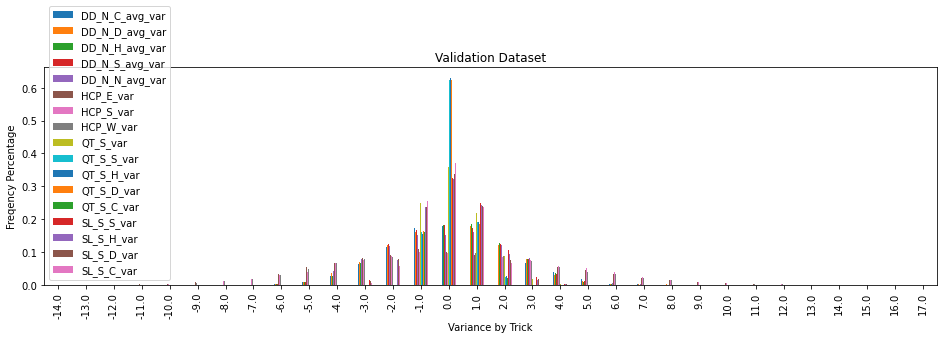

In [32]:
# plot dd variance using 1 trick precision
plotd = {}
for n in y_names:
    plotd[n+'_var'] = df_preds[n+'_var'].astype('float').round(0).value_counts(normalize=True).sort_index()
pd.DataFrame(plotd).plot(kind='bar',figsize=(16,4), xlabel='Variance by Trick', ylabel='Freqency Percentage', title='Validation Dataset')

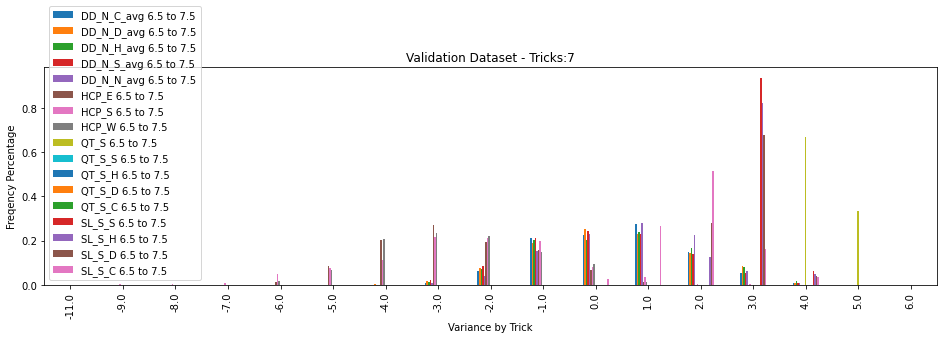

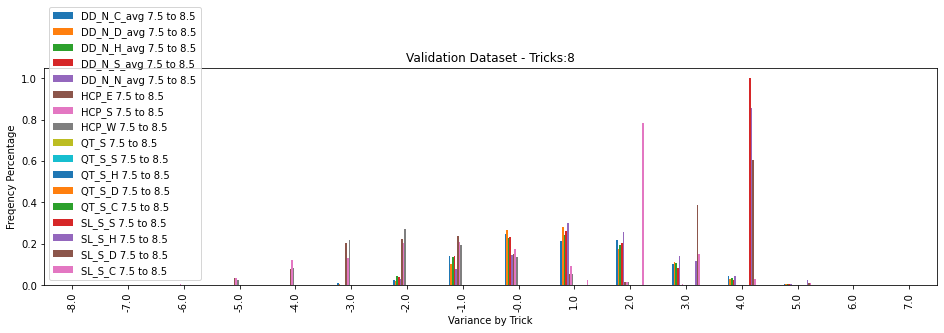

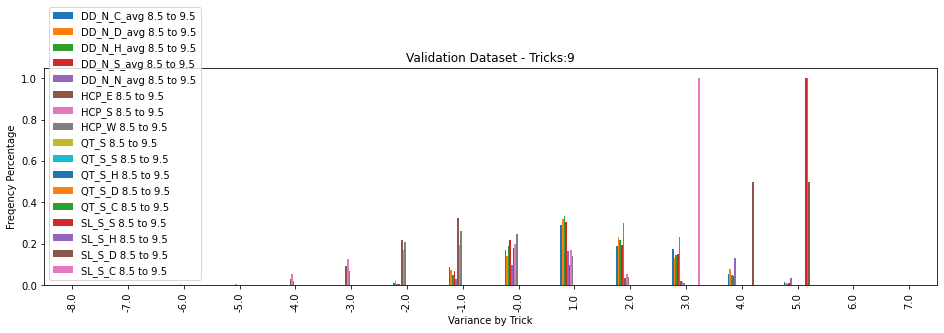

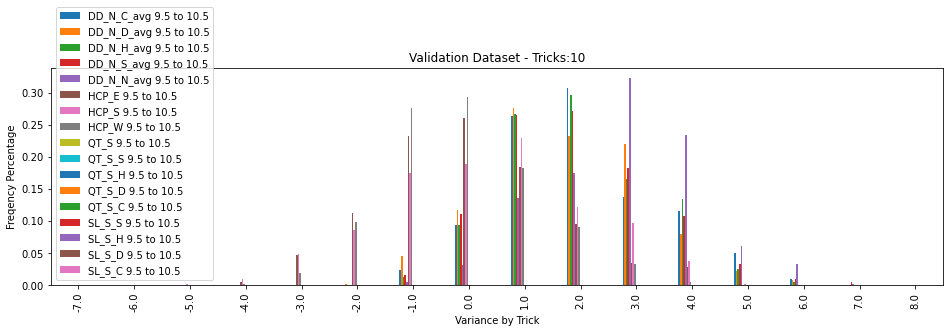

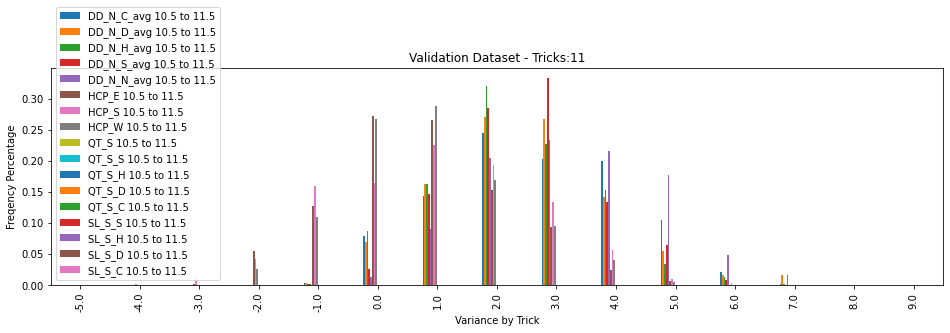

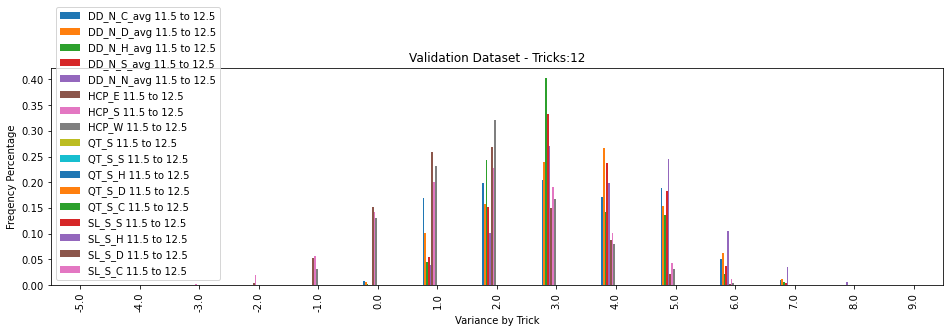

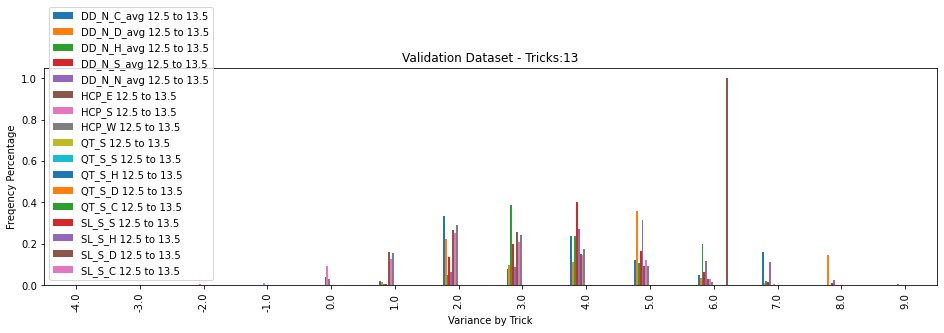

In [33]:
# plot dd variance, by trick count, using 1 trick precision
for t in range(6,13):
    plotd = {}
    for n in y_names:
        plotd[n+' '+str(t+.5)+' to '+str(t+1.5)] = df_preds[df_preds[n].between(t+.5,t+1.5,inclusive='left')][n+'_var'].astype('float').round(0).value_counts(normalize=True).sort_index()
    pd.DataFrame(plotd).plot(kind='bar',figsize=(16,4), xlabel='Variance by Trick', ylabel='Freqency Percentage', title='Validation Dataset - Tricks:'+str(t+1))

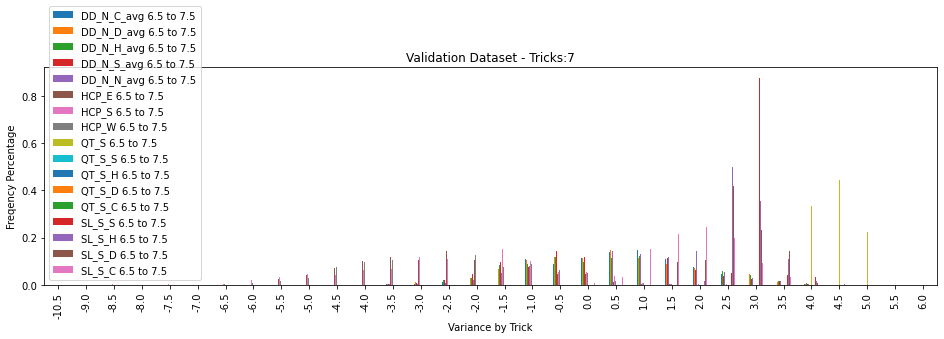

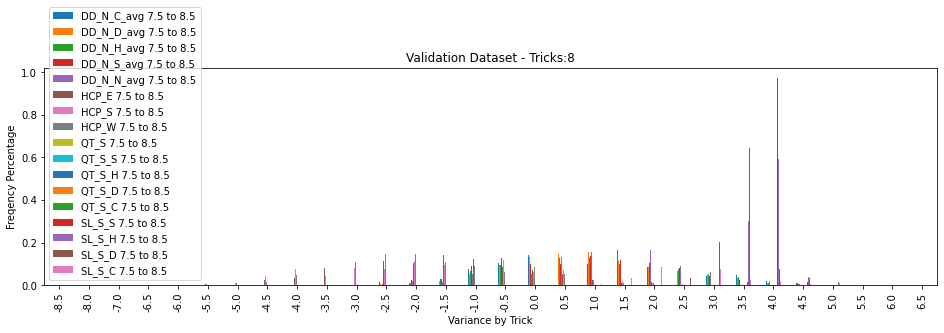

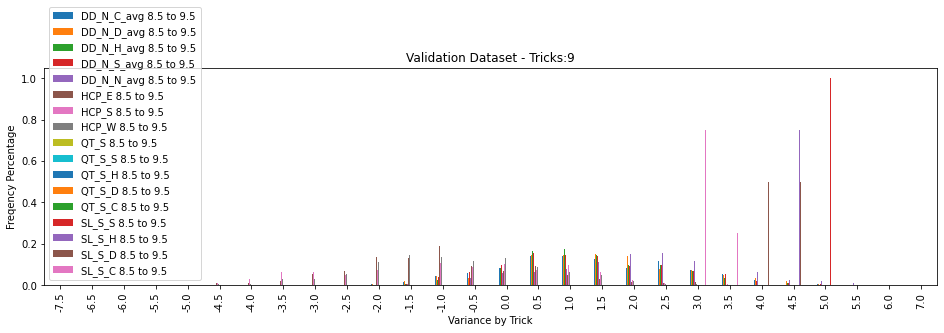

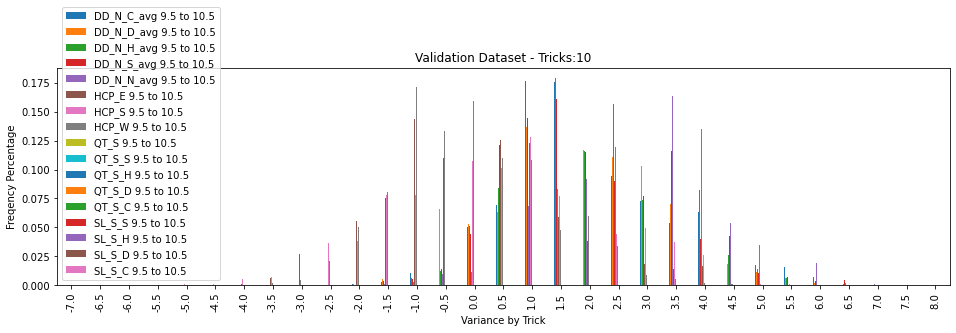

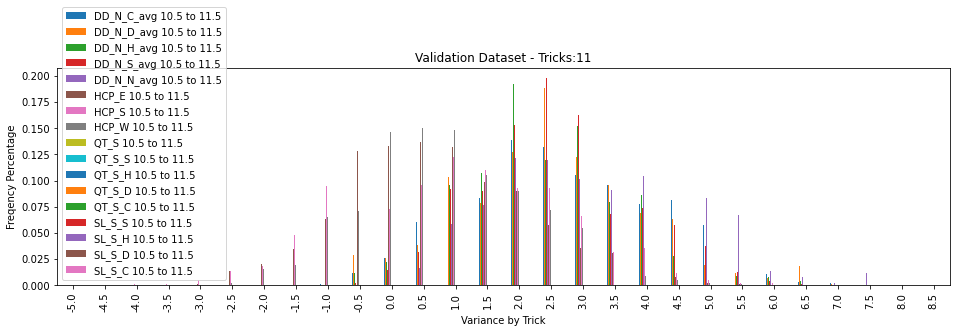

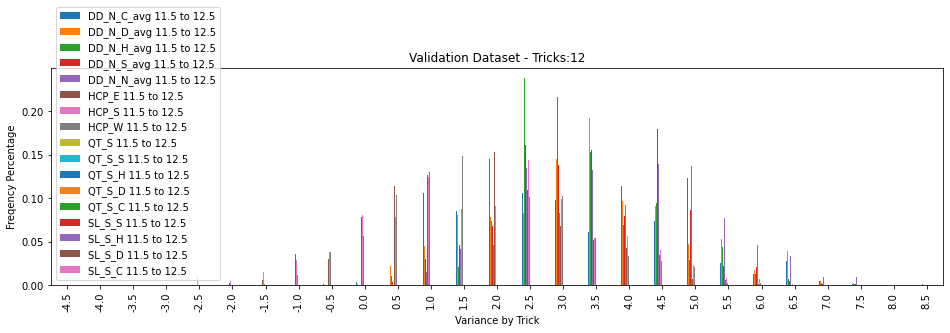

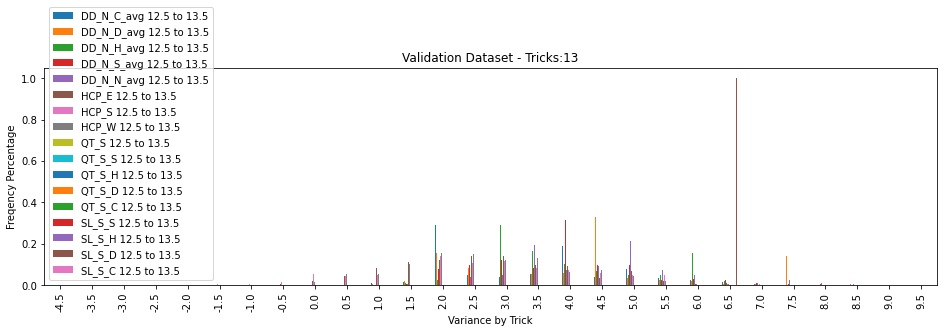

In [34]:
# plot dd variance, by trick count, using .5 trick precision
precision = .5
for t in range(6,13):
    plotd = {}
    for n in y_names:
        plotd[n+' '+str(t+.5)+' to '+str(t+1.5)] = df_preds[df_preds[n].between(t+.5,t+1.5,inclusive='left')][n+'_var'].astype('float').div(precision*10).round(1).mul(precision*10).value_counts(normalize=True).sort_index()
    pd.DataFrame(plotd).plot(kind='bar',figsize=(16,4), xlabel='Variance by Trick', ylabel='Freqency Percentage', title='Validation Dataset - Tricks:'+str(t+1))